<a href="https://colab.research.google.com/github/EddyGiusepe/ML-Mastery_Early_Stopping_em_Red_Neural/blob/main/ML_Mastery_Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Early Stopping**

Aqui aprenderemos que **interromper** o treinamento de uma ``rede neural`` antes de ajustar (overfit, superdimensionado) o conjunto de dados de treinamento pode reduzir o superajuste e melhorar a generalização de redes neurais profundas.

Um grande desafio no treinamento de redes neurais é quanto tempo para treiná-las.

Muito pouco treinamento significa que o modelo não se adequará ao treino e aos conjuntos de teste. Demasiado treinamento significa que o modelo superestimará o conjunto de dados de treinamento e terá um desempenho ruim no conjunto de teste.


Um meio-termo é treinar no conjunto de dados de treinamento, **mas interromper o treinamento no ponto em que o desempenho em um conjunto de dados de validação começa a degradar**. Essa abordagem simples, eficaz e amplamente usada para treinar redes neurais é chamada de **parada precoce**.

Keras oferece suporte para parada antecipada por meio do retorno de chamada ``EarlyStopping``, que permite especificar a métrica a ser monitorada durante o treinamento.


 **patient early stopping**
 
**es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)​**


O exemplo abaixo demonstra um **Perceptron Multicamadas** com parada precoce em um problema de classificação binária que irá parar quando a perda (loss) de validação não melhorar por $200$$ períodos (``epoch``) de treinamento.


## Importando as livrarias que utilizaremos

In [1]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

## Geramos nosso Dataset

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

## Dividimos em Dados de treino e de Teste

In [3]:
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## Construímos a nossa Rede Neural

In [4]:
model = Sequential()

model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Compilamos nosso modelo (Rede Neural)

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## patient early stopping

In [6]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

## Ajustamos nosso modelo


In [7]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])

Epoch 00680: early stopping


## Avaliamos nosso modelo

In [8]:
_, train_acc = model.evaluate(trainX, trainy, verbose=1)
_, test_acc = model.evaluate(testX, testy, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.8286


In [9]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.829


## Graficamos as nossas curvas de aprendizagem

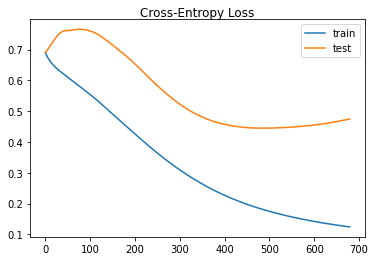

In [10]:
# plot loss learning curves


#pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

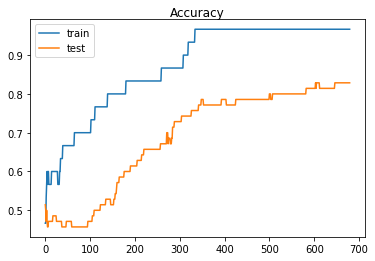

In [12]:
# plot accuracy learning curves

#pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Você deve executar o exemplo de código com e sem **parada antecipada** e descrever o efeito que tem nas curvas de aprendizado durante o treinamento